###### Analysis:

### Observations on questions asked:
    * Where do earthquakes happen by Country? / top 10
    * What is the density of Magnitudes for Earthquakes?
    * What month do earthquakes mostly occur?
    * What is the alert level density of earthquakes?
    * Is there a Relationship between Magnitude and % chance of Large Oceanic Event?
    
1. Where do earthquakes happen by Country? / top 10
    * The Total number of earthquakes by Counties, showed that USA (count: 1733) has far more earthquakes than any other country over the ten years (2010-2020). Indonesia being the second highest at 438. Most countries approximately one.
    
2. Question: What is the density of Magnitudes for Earthquakes?
    * The Density Histogram of Earthquake Magnitudes shows that the Magnitudes around  5.5 to <6 are the most dense and thus, these magnitudes will occur more frequently than others around the world. 
    
3. What month do earthquakes mostly occur?
    * The Density Histogram of Earthquake Magnitudes plot shows that earthquakes can happen at any time of the year. The numbers reveal how 'almost evenly' spread the number of earthquake events are, in each month. Varying between 400 and 550 each month.

4. What is the alert level density of earthquakes?
    * The 'Total Number of Earthquakes per Alert Level (2010-2020)' plot, and the heat map shows that the Green alerts (5852) have far more number of earthquakes than the other alert levels (orange:37,red:16,yellow:144). This is a good thing. As the alert levels tell us the number of fatalities and infrastructure damage value respectively. Additionally, the plot 'Density Histogram of Earthquake Alert Level Showing Magnitudes' shows that all levels of magnitudes that were noticedin this green alert level. Green level density: >1.3 and other alert levels were all lower than 0.3 
    
5. Is there a Relationship between Magnitude and % chance of Large Oceanic Event?
    * The linear regression plots 'Earthquake Magnitude vs % Chance of Large Oceanic Event (2010-2020)' shows that no correlation between Magnitude and Large Oceanic Events were seen because the value of both charts r-squared = 0.09 rounded . This indicates that no correlation can be depicted. Note: Charts were seperated by magnitude because the scatter plots showed two distinct seperations of clustering. One set of clusters for magnitudes >=3.6 and <- 6.1 and then another set of cluster > 6.1

* Notes: It was interesting to see that in the second regression analysis plot, where magnitudes were above 6.1, that there was one possible 'outlier' at 8.6  However, this was indeed an earthquake at this great magnitude, that did not cause a large oceanic event. Therefore, we need to include other variables that cause large oceanic effects such as the depth of the earthquake to further analyse how earthquakes can cause a large oceanic event. 
    * include latitudes and longitudes, only in the ocean
    * include magnitude
    * include depth of the earthquake
    * look at other possbile Models that could fit better


In [1]:
#Dependencies and Set Up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import matplotlib.ticker as ticker
import gmaps

from config import gkey
from datetime import datetime as dt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import linregress

#define the output folder to save csv data and png to
output_folder = "../output_data/"

In [2]:
#Path to csv file
earthquake_data_path = output_folder + 'EarthquakeData.csv'

#Read the earthquake data
earthquake_data = pd.read_csv(earthquake_data_path,usecols=range(1,14))

In [3]:
#Ensure that the Date is in datetime format, need to redo on loading from csv
earthquake_data['Date']=  pd.to_datetime(earthquake_data['Date'])

In [4]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6048 non-null   object        
 1   Latitude      6048 non-null   float64       
 2   Longitude     6048 non-null   float64       
 3   Depth (km)    6048 non-null   float64       
 4   Lat_Lng       6048 non-null   object        
 5   Alert         6048 non-null   object        
 6   Place         6047 non-null   object        
 7   Date          6048 non-null   datetime64[ns]
 8   Magnitude     6048 non-null   float64       
 9   Tsunami       6048 non-null   int64         
 10  Type          6048 non-null   object        
 11  Country       5793 non-null   object        
 12  Country_Code  6048 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 614.4+ KB


In [5]:
#Check the earthquake data
earthquake_data.head()

,id,Latitude,Longitude,Depth (km),Lat_Lng,Alert,Place,Date,Magnitude,Tsunami,Type,Country,Country_Code
0,us6000d454,-0.7603,-21.1005,10.00,"(-0.7603, -21.1005)",green,central Mid-Atlantic Ridge,2020-12-29 18:34:57.647,5.7,0,earthquake,Ascension,SH
1,us6000d3xn,43.3890,-126.9951,10.00,"(43.389, -126.9951)",green,"212 km W of Bandon, Oregon",2020-12-29 02:10:29.079,5.7,1,earthquake,Oregon,US
2,us6000d3x8,-6.3985,154.6521,23.63,"(-6.3985, 154.6521)",green,"92 km W of Panguna, Papua New Guinea",2020-12-29 01:23:29.769,5.4,0,earthquake,Bougainville,PG
3,us6000d3ln,-0.1917,124.5061,51.77,"(-0.1917, 124.5061)",green,"170 km S of Tomohon, Indonesia",2020-12-28 02:31:11.352,5.1,0,earthquake,North Sulawesi,ID
4,us6000d3kx,14.2272,56.7800,10.00,"(14.2272, 56.78)",green,Owen Fracture Zone region,2020-12-28 00:46:46.797,5.4,0,earthquake,Muhafazat Hadramawt,YE


In [6]:
# Question: Where do earthquakes happen by Country?

In [7]:
#Check size of country codes to ensure data is accurate/makes sense
earthquakes_gb_country = earthquake_data.groupby(['Country_Code'])
earthquakes_gb_country.size()

Country_Code
AF    19
AG     2
AL     3
AQ    13
AR    48
      ..
YE    17
YT     2
ZA    32
ZM     1
ZW     2
Length: 118, dtype: int64

In [8]:
#Create Bar Graph
#Group the data by country and # count of ids
bar_graph_data = earthquake_data.groupby(['Country_Code'])['id'].count()
bar_graph_data.sort_values()

Country_Code
TM       1
MN       1
ST       1
ET       1
TC       1
      ... 
PG     299
CL     336
TO     344
ID     438
US    1733
Name: id, Length: 118, dtype: int64

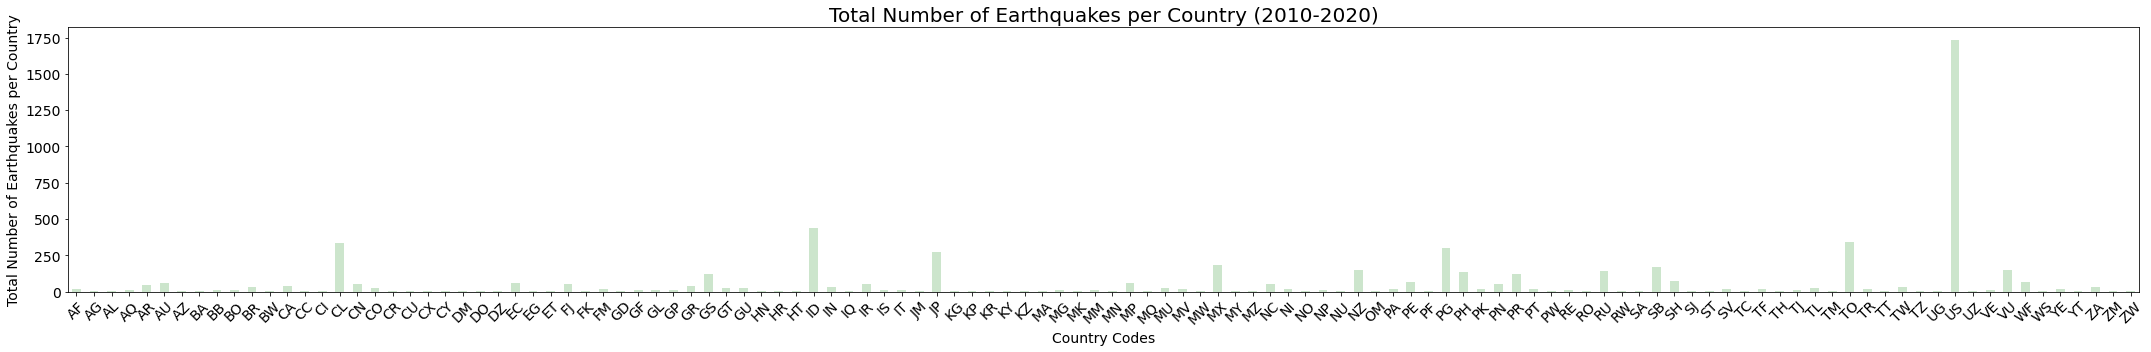

In [9]:
#Show all countries.
#Create the bar plot
country_codes_count = bar_graph_data.plot.bar(figsize=(30,5), color='g', alpha=0.2, fontsize=14, rot=45)

#Add required labels
plt.xlabel('Country Codes', fontsize=14)
plt.ylabel('Total Number of Earthquakes per Country', fontsize=14)
plt.title('Total Number of Earthquakes per Country (2010-2020)', fontsize=20)
plt.tight_layout()

In [10]:
#Create a new data frame with just country codes and their total count
#Split the data into ids and alert levels and get the number to plot by using the size function
groupby_code=earthquake_data.groupby(['id','Country_Code'])
code_df=pd.DataFrame(groupby_code.size())

#Create the dataframe with total count of alert levels
country_code=pd.DataFrame(code_df.groupby(['Country_Code']).count())
country_code.columns = ['Total Count']

#Create and format the percentage
country_code['Percentage of Country Code']=(100*(country_code['Total Count']/country_code['Total Count'].sum()))

#Format the "Percentage of Alert Level" column
country_code['Percentage of Country Code']=country_code['Percentage of Country Code']

#Print out DataFrame
country_code.head()

,Total Count,Percentage of Country Code
Country_Code,,
AF,19,0.314153
AG,2,0.033069
AL,3,0.049603
AQ,13,0.214947
AR,48,0.793651


In [11]:
#Sort the df in descending order
sorted_country_code = country_code.sort_values(by=['Total Count'], ascending=False)
sorted_country_code.tail()

,Total Count,Percentage of Country Code
Country_Code,,
MW,1,0.016534
MY,1,0.016534
MZ,1,0.016534
NU,1,0.016534
MN,1,0.016534


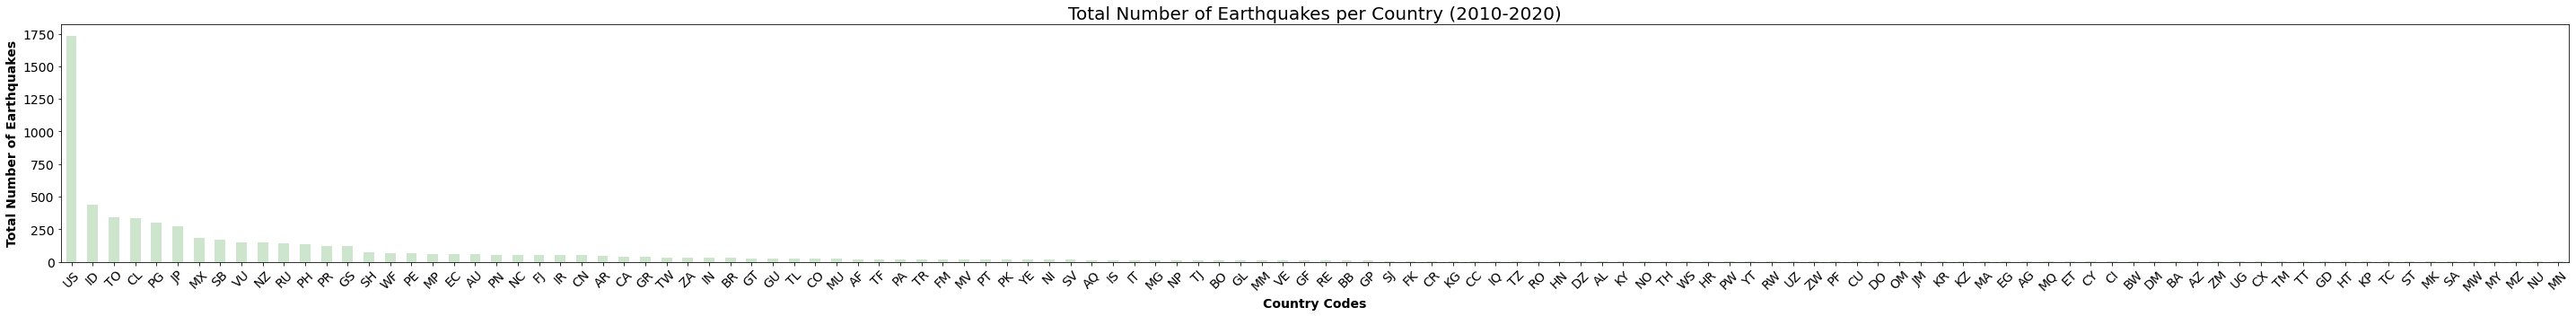

In [12]:
#Create the bar plot
descending_order_plot = sorted_country_code['Total Count'].plot.bar(figsize=(40,5), color='g', alpha=0.2,
                                                                    rot=45, fontsize=14)
#Add required labels
plt.xlabel('Country Codes', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Earthquakes', fontsize=14, fontweight='bold')
plt.title('Total Number of Earthquakes per Country (2010-2020)', fontsize=20)
plt.tight_layout()

#Save plot as an image
plt.savefig(output_folder  + "1_CountryCodesVSNumberofEarthquakesBar.png",facecolor = 'white')


In [13]:
#Sort country codes by top and bottom 10 countries to have a better visual
top_10 = sorted_country_code.head(10)
bottom_10 = sorted_country_code.tail(10)

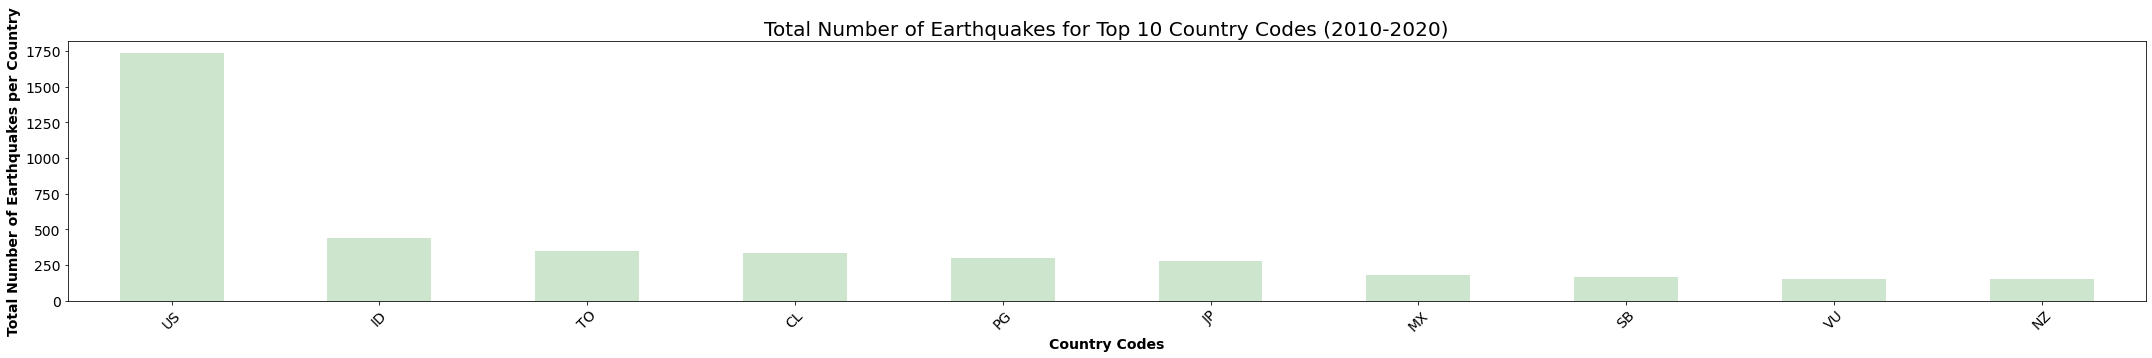

In [14]:
#Create the bar plot
top_10_plot = top_10['Total Count'].plot.bar(figsize=(30,5), color='g', alpha=0.2, fontsize=14, rot=45)

#Add required labels
plt.xlabel('Country Codes', fontsize=14,fontweight='bold')
plt.ylabel('Total Number of Earthquakes per Country', fontsize=14, fontweight='bold')
plt.title('Total Number of Earthquakes for Top 10 Country Codes (2010-2020)', fontsize=20)
plt.tight_layout()

#Save plot as an image
plt.savefig(output_folder + "2_CountryCodesVSNumberofEarthquakesTop10Bar.png",facecolor = 'white')

In [15]:
# As you can see by the first bar chart that most countries have very few earthquakes over 10 years. 
# A minimum of one earthquake.
# The second bar chart reveals that the United States has significantly more earthquakes than all other countries.
# (1733 Earthquakes)
# The remaining top 10 countries that have earthquakes, ie)Indonesia:  has a total of 438 
# and progressively reduces to New Zealand having 148 earthquakes over the ten years.

In [16]:
#Question: What is the density of Magnitudes for Earthquakes

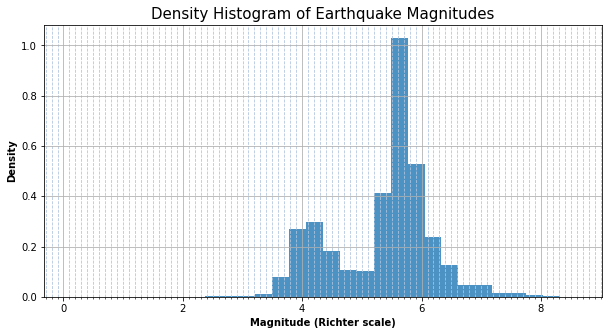

In [17]:
#Density Historgram of Earthquake Magnitudes

currMag = earthquake_data['Magnitude']
fig, (ax1) = plt.subplots(figsize=(10,5))

ax1.hist(currMag, density=True, alpha=0.8,bins=30)  
ax1.set_xlabel("Magnitude (Richter scale)", fontweight="bold")
ax1.set_ylabel("Density", fontweight='bold')
ax1.set_title("Density Histogram of Earthquake Magnitudes", fontsize=15)

#ax1.set_xlim(0, 9)
ax1.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax1.xaxis.set_minor_locator(AutoMinorLocator(20))

#set axis grid lines
ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', color='lightsteelblue', linestyle='--')

#save the plot
plt.savefig(output_folder + "3_DensityHisEQMagnitudes.png", facecolor = 'white')
plt.show()

In [18]:
# Density Histogram of Earthquake Magnitudes shows that Magnitudes around  5.5 to <6 are the most dense
# and thus, these magnitudes will occur more frequently than others around the world. 

In [19]:
# Question: What month do earthquakes mostly occur? (over 10 years)

In [20]:
# Get the data needed : ID, Date , Month
earthquake_month = earthquake_data[['id','Date']]
earthquake_month.head()

,id,Date
0,us6000d454,2020-12-29 18:34:57.647
1,us6000d3xn,2020-12-29 02:10:29.079
2,us6000d3x8,2020-12-29 01:23:29.769
3,us6000d3ln,2020-12-28 02:31:11.352
4,us6000d3kx,2020-12-28 00:46:46.797


In [21]:
# Create a Month_Name header wth NaN values
header_list = ['id','Date','Month_Name']
earthquake_month = earthquake_month.reindex(columns = header_list)
earthquake_month.head()

,id,Date,Month_Name
0,us6000d454,2020-12-29 18:34:57.647,NaN
1,us6000d3xn,2020-12-29 02:10:29.079,NaN
2,us6000d3x8,2020-12-29 01:23:29.769,NaN
3,us6000d3ln,2020-12-28 02:31:11.352,NaN
4,us6000d3kx,2020-12-28 00:46:46.797,NaN


In [22]:
# Set the Month_Name values
earthquake_month['Month_Name']= pd.DatetimeIndex(earthquake_month['Date']).strftime('%b')

In [23]:
# Show the values are set
earthquake_month.tail()

,id,Date,Month_Name
6043,nc72282711,2014-08-24 06:20:44.070,Aug
6044,usb000rzmg,2014-08-03 04:30:13.570,Aug
6045,usb000jyiv,2013-09-24 07:29:47.970,Sep
6046,usb000gcdd,2013-04-19 20:02:47.540,Apr
6047,ci14607652,2010-04-04 18:40:42.360,Apr


In [24]:
# Get the counts grouped by the months 
earthquake_month_group = earthquake_month.groupby('Month_Name')['id'].count()
earthquake_month_group[:2]

Month_Name
Apr    513
Aug    543
Name: id, dtype: int64

In [25]:
# Sort the series by Month_Name 
#no longer in order after grouping. Create a category group and sort by index
cat = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
earthquake_month_group.index = pd.CategoricalIndex(earthquake_month_group.index, categories=cat, ordered=True)
earthquake_month_group = earthquake_month_group.sort_index()

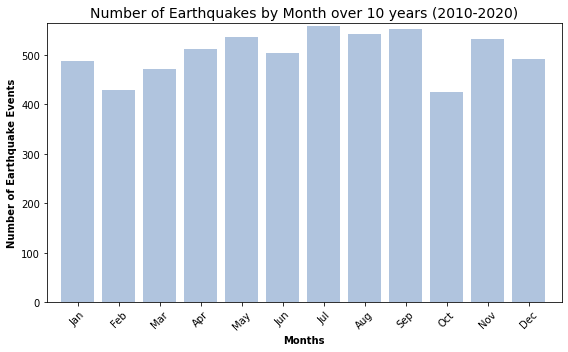

In [26]:
# Create a bar chart based off of the group series 
plt.figure(figsize=(8,5))

x_axis = earthquake_month_group.index.values
y_axis = earthquake_month_group.values

fig = plt.bar(x_axis, y_axis, color='lightsteelblue', align="center")
# Give the chart a title, x label, and y label
fig = plt.title("Number of Earthquakes by Month over 10 years (2010-2020)", fontsize=14)
fig = plt.xlabel("Months",fontweight='bold')
fig = plt.ylabel("Number of Earthquake Events", fontweight='bold')

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.20) 
# Set the limits of the y axis
plt.ylim(0, max(earthquake_month_group.values)+5)

#rotate the x labels
plt.xticks(rotation=45)

plt.tight_layout()
#save the figure
plt.savefig(output_folder + "4_NumberEarthquakesByMonth.png", facecolor = 'white')
plt.show()

In [27]:
# The above plot shows that earthquakes can happen at any time of the year. 
# The numbers show how 'almost evenly' spread the number of earthquake events are, in each month.
# Varying between 400 and 550 each month.

In [28]:
#Question: What is the alert level density for earthquakes?

In [29]:
#Groupby alert to analyse the frequency of earthquake per alert type
earthquakes_gb_alert = earthquake_data.groupby(['Alert'])
earthquakes_gb_alert.size()

Alert
green     5851
orange      37
red         16
yellow     144
dtype: int64

In [30]:
earthquakes_gb_alert.count()

,id,Latitude,Longitude,Depth (km),Lat_Lng,Place,Date,Magnitude,Tsunami,Type,Country,Country_Code
Alert,,,,,,,,,,,,
green,5851,5851,5851,5851,5851,5850,5851,5851,5851,5851,5598,5851
orange,37,37,37,37,37,37,37,37,37,37,36,37
red,16,16,16,16,16,16,16,16,16,16,16,16
yellow,144,144,144,144,144,144,144,144,144,144,143,144


In [31]:
#Split the data into ids and alert levels and get the number to plot by using the size function
groupby_alert=earthquake_data.groupby(['Alert','id'])
alert_df=pd.DataFrame(groupby_alert.size())
#Create the dataframe with total count of alert levels
alert_level=pd.DataFrame(alert_df.groupby(['Alert']).count())
alert_level.columns = ['Total Count']
#Create and format the percentage
alert_level['Percentage of Alert Level']=(100*(alert_level['Total Count']/alert_level['Total Count'].sum()))
#Format the “Percentage of Alert Level” column
alert_level['Percentage of Alert Level']=alert_level['Percentage of Alert Level']
#Print out DataFrame
alert_level

,Total Count,Percentage of Alert Level
Alert,,
green,5851,96.742725
orange,37,0.611772
red,16,0.264550
yellow,144,2.380952


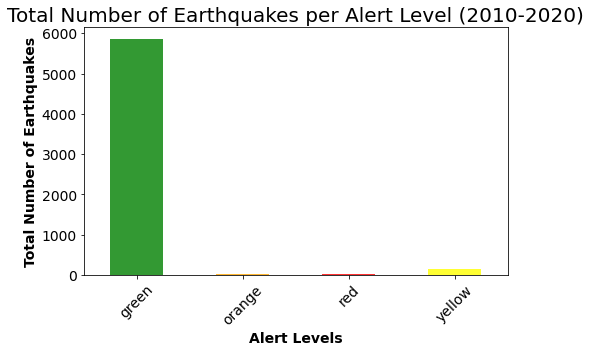

In [33]:
#Create the bar plot
alert_level_plot = alert_level['Total Count'].plot.bar(figsize=(8,5),alpha=0.8, fontsize=14, rot=45,
                                                      color=['green', 'orange', 'red', 'yellow'])
#Add required labels
plt.xlabel('Alert Levels', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Earthquakes', fontsize=14, fontweight='bold')
plt.title('Total Number of Earthquakes per Alert Level (2010-2020)', fontsize=20)
#plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
plt.tight_layout()

#Save plot as an image
plt.savefig(output_folder + "5_AlertLevelVSNumberofEarthquake.png",facecolor = 'white')

In [34]:
#Analysis: Above bar chart shows that the largest number of earthquakes appear as a green alert leverl.
# 5852 Green alerts over the 10 years
# 37 Orange alerts 
# 16 Red
#144 yellow

In [35]:
#Heatmap of magnitude distribution globally of 10 years, with 5 markers of largest magnitudes.
#Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [36]:
# Store 'Lat' and 'Lng' into  locations 
locations = earthquake_data[["Latitude", "Longitude"]].astype(float)

# Convert magnitude to float and store
magnitude_data = earthquake_data["Magnitude"].astype(float)

In [37]:
#Split the data into ids and alert levels and get the number to plot by using the size function
groupby_magnitude=earthquake_data.groupby(['Magnitude','Lat_Lng','Country_Code','Alert'])
mag_df=pd.DataFrame(groupby_magnitude.size())

#Create the dataframe with total count of alert levels
magnitude=pd.DataFrame(mag_df.groupby(['Magnitude','Lat_Lng','Country_Code','Alert']).count())
magnitude.tail(5)

0
Magnitude Lat_Lng              Country_Code Alert    
8.2       (0.802, 92.463)      ID           green   1
          (15.0222, -93.8993)  MX           red     1
8.3       (-31.5729, -71.6744) CL           orange  1
          (54.892, 153.221)    RU           green   1
8.6       (2.327, 93.063)      ID           yellow  1

In [39]:
#Create Heatmap + Marker Location Map for Top 5 Magnitudes
fig = gmaps.figure(map_type='HYBRID')

heat_layer = gmaps.heatmap_layer(locations, weights=magnitude_data, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

top_5_earthquakes = [
    {'Location': (2.327, 93.063), 'Country_Code':'ID', 'Alert_Level':'Yellow', 'Magnitude':(8.6)},
    {'Location': (54.892, 153.221), 'Country_Code':'RU', 'Alert_Level':'Green','Magnitude':(8.3)},
    {'Location': (-31.5729, -71.6744), 'Country_Code':'CL', 'Alert_Level':'Orange','Magnitude':(8.3)},
    {'Location': (15.0222, -93.8993), 'Country_Code':'MX', 'Alert_Level':'Red','Magnitude':(8.2)},
    {'Location': (0.802, 92.463), 'Country_Code':'ID', 'Alert_Level':'Green','Magnitude':(8.2)}
]

eq_locations = [eq['Location'] for eq in top_5_earthquakes]
info_box_template = """
<dl>
<dt>Country Code</dt><dd>{Country_Code}</dd>
<dt>Alert Level</dt><dd>{Alert_Level}</dd>
<dt>Magnitude</dt><dd>{Magnitude}</dd>
</dl>
"""
eq_info = [info_box_template.format(**eq) for eq in top_5_earthquakes]

marker_layer = gmaps.marker_layer(eq_locations, info_box_content=eq_info)
fig.add_layer(marker_layer)
fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap above shows the distribution of magnitudes, along with the top 5 magnitudes. 
# zoom in and one can see that there are mostly green alerts.

In [41]:
# Question: What is the alert level density of earthquakes?

In [42]:
# Plot B: for proof along with magnitudes
# Get the data needed 
earthquake_mag = earthquake_data[['id','Magnitude', 'Alert']]

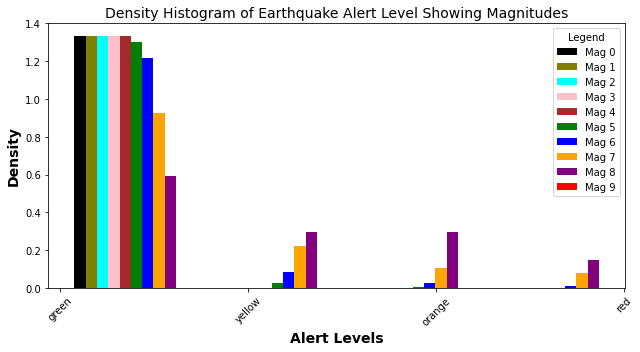

In [43]:
#create a new column
np.seterr(divide='ignore', invalid='ignore')
plt.figure(figsize=(9,5))

# Make a separate list for each magnitude
x9 = list(earthquake_mag[earthquake_mag['Magnitude']>=9]['Alert'])
x8 = list(earthquake_mag[(earthquake_mag['Magnitude']>=8) & (earthquake_mag['Magnitude']<9)]['Alert'])
x7 = list(earthquake_mag[(earthquake_mag['Magnitude']>=7) & (earthquake_mag['Magnitude']<8)]['Alert'])
x6 = list(earthquake_mag[(earthquake_mag['Magnitude']>=6) & (earthquake_mag['Magnitude']<7)]['Alert'])
x5 = list(earthquake_mag[(earthquake_mag['Magnitude']>=5) & (earthquake_mag['Magnitude']<6)]['Alert'])
x4 = list(earthquake_mag[(earthquake_mag['Magnitude']>=4) & (earthquake_mag['Magnitude']<5)]['Alert'])
x3 = list(earthquake_mag[(earthquake_mag['Magnitude']>=3) & (earthquake_mag['Magnitude']<4)]['Alert'])
x2 = list(earthquake_mag[(earthquake_mag['Magnitude']>=2) & (earthquake_mag['Magnitude']<3)]['Alert'])
x1 = list(earthquake_mag[(earthquake_mag['Magnitude']>=1) & (earthquake_mag['Magnitude']<2)]['Alert'])
x0 = list(earthquake_mag[(earthquake_mag['Magnitude']>=0) & (earthquake_mag['Magnitude']<1)]['Alert'])

# Assign colors for each magnitude and the names
colors = ['black', 'olive', 'cyan', 'pink', 'brown', 'green', 'blue', 'orange', 'purple', 'red']
names = ['Mag 0', 'Mag 1', 'Mag 2', 'Mag 3', 'Mag 4','Mag 5', 'Mag 6', 'Mag 7', 'Mag 8', 'Mag 9']

# Define the plot
plt.hist([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9], bins = 4, density=True,
         color = colors, label=names) 

# assign labels
plt.xlabel("Alert Levels", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.title("Density Histogram of Earthquake Alert Level Showing Magnitudes",fontsize=14)


plt.xticks(rotation=45)

plt.legend(title='Legend',fancybox=True) 
plt.tight_layout()
#save the figure
plt.savefig(output_folder + "8_DensityHistEQAlertWithMagnitudes.png", facecolor = 'white')

plt.show()

In [44]:
# Thus the alert level density clearly shows that the green alert level is far more dense 1.3 
# compared to other levels is around 0.3 or less. 
# Thus more earthquakes are categorized at this green level.
# Additionally, all magnitudes are shown on the graph (except 9+) in the green alert level.

In [45]:
# Question: Is there a relationship between the magnitude of earthquakes 
# and % chance that a large oceanic event will occur?

In [46]:
# Get the data needed: 
# count of Magnitude: counts all rows in group
# sum of tsunami: sums together where is a 1 value 
#(if it was count, they would be equal numbers to magnitude count)

#group by Magnitude (total sum of tsunami at that magnitude)/(total counts at that mag) * 100
mag_vs_tsunami_data = earthquake_data.groupby(["Magnitude"]).agg({
                            "Magnitude": "count", "Tsunami": "sum"})

#tsuanami count
mag_vs_tsunami_data.rename(columns = {'Magnitude':'Magnitude_Count','Tsunami':'Oceanic_Event_Count'}, inplace = True)
percent_tsunami = mag_vs_tsunami_data['Oceanic_Event_Count'] /mag_vs_tsunami_data['Magnitude_Count'] *100
mag_vs_tsunami_data.insert(2,"% Large Oceanic Event",percent_tsunami,True)

mag_vs_tsunami_data.reset_index(drop=False, inplace=True)

mag_vs_tsunami_data.sort_values(by="Magnitude")
mag_vs_tsunami_data.head()


,Magnitude,Magnitude_Count,Oceanic_Event_Count,% Large Oceanic Event
0,0.10,1,0,0.0
1,0.20,1,0,0.0
2,1.51,1,0,0.0
3,2.04,1,0,0.0
4,2.27,1,0,0.0


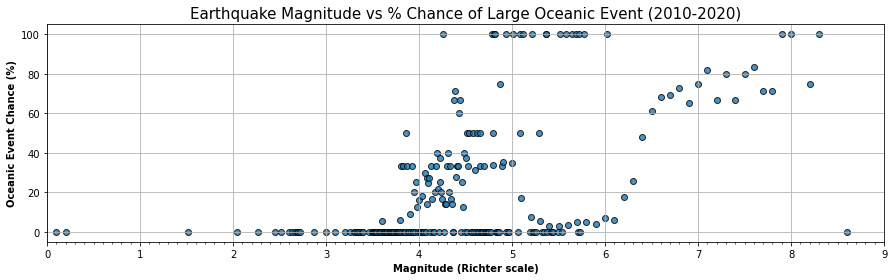

In [47]:
#Plot: Magnitude vs % Chance of Large Oceanic Event 
fig, ax = plt.subplots(figsize=(15,4))

ax.scatter(mag_vs_tsunami_data["Magnitude"], mag_vs_tsunami_data["% Large Oceanic Event"], alpha = 0.8, edgecolors="k", linewidth=1)

#Labels
ax.set_title("Earthquake Magnitude vs % Chance of Large Oceanic Event (2010-2020)",fontsize=15) 
ax.set_xlabel("Magnitude (Richter scale)", fontweight='bold')
ax.set_ylabel("Oceanic Event Chance (%)", fontweight='bold')
ax.set_xlim(0, 9)
ax.grid(True)
ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

#save the figure
plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

### What we are seeing in above plot 'generally':

1. Magnitudes: 0 - 3.5;  
    1. No large oceanic events at these magnitudes
    
2. Magnitudes: 3.6 - 6.1;  
    1. There seems to be a lot of variety, if there is an oceanic event or not. Analysis can be done. 
    2. This may be due to some regions being land-locked and other being in the ocean.
    3. This could be due to other factors as well, such as the depth of the earthquake...
                    
3. Magnitudes: 6.1 - 7;      
    1. There may be a +ve trend. How many are landlocked vs oceanic? Analysis needed.
                         
4. Magnitudes: > 7;
    1. May continue +ve trend from 6.1-7 continuing and sloping off.
    2. May be that most above 7 are oceanic, and will most likely produce an oceanic event
    3. Would need to clarify, event at 8.6, see if landlocked or depth affected result.
    4. May just be fewer events to track here as well.
    5. Further analysis needed.
                        

In [48]:
# TEST FOR TRENDS : Regression Analysis
# Split the data, as the data shows 2 possible scenarios
# Magnitudes: 3.6 to to 6.1 (varies a lot)
mag_tsun_3p6To6p1 = mag_vs_tsunami_data[(mag_vs_tsunami_data['Magnitude']>=3.6) \
                             & (mag_vs_tsunami_data['Magnitude']<=6.1)]

# TEST FOR TRENDS : Regression Analysis 
# Magnitudes: >6.1 (does not vary as much)
mag_tsun_GT6p1 = mag_vs_tsunami_data[(mag_vs_tsunami_data['Magnitude']>6)]

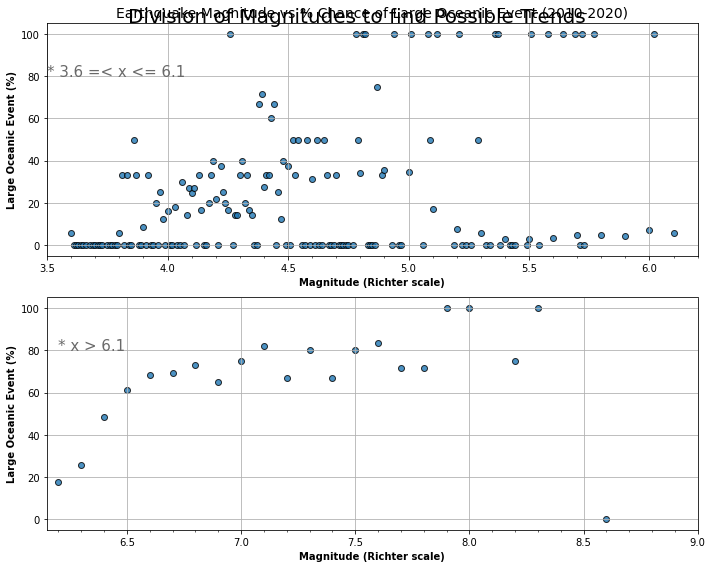

In [49]:
# Plot 2 scatter plots divided out: 1.) 3.6 to 6.1 magnitude 2.)  > 6.1 magnitude

#Magnitude vs Large Oceanic Event 

# 3.6 to 6.1
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
fig.suptitle('Division of Magnitudes to find Possible Trends', fontsize=20)


ax1.scatter(mag_tsun_3p6To6p1["Magnitude"], mag_tsun_3p6To6p1["% Large Oceanic Event"], alpha = 0.8, edgecolors="k", linewidth=1)

#Label
ax1.set_title("Earthquake Magnitude vs % Chance of Large Oceanic Event (2010-2020)", fontsize = 14) 

ax1.set_xlabel("Magnitude (Richter scale)", fontweight='bold')
ax1.set_ylabel("Large Oceanic Event (%)", fontweight='bold')
ax1.set_xlim(3.5, 6.2)
ax1.grid(True)
ax1.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.annotate("* 3.6 =< x <= 6.1",(3.5,80),fontsize=15,color="dimgray")
#############

# 2 mag_tsun_GT6p1
# Magnitude vs % Large Oceanic Event (2010 - 2020)
# Magnitudes of  >6.1

ax2.scatter(mag_tsun_GT6p1["Magnitude"], mag_tsun_GT6p1["% Large Oceanic Event"], alpha = 0.8, edgecolors="k", linewidth=1)

#Label
#ax2.set_title("Earthquake Magnitude vs % Chance of Large Oceanic Event (2010-2020)", fontsize = 14) 
ax2.set_xlabel("Magnitude (Richter scale)", fontweight='bold')
ax2.set_ylabel("Large Oceanic Event (%)", fontweight='bold')
ax2.set_xlim(6.15, 9)
ax2.grid(True)
ax2.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.annotate("* x > 6.1",(6.2,80),fontsize=15,color="dimgray")

fig.tight_layout()
#save
plt.savefig(output_folder + "DivisionMagnitudesScatterPlot.png", facecolor = 'white')

plt.show()

In [50]:
# LINEAR REGRESSION

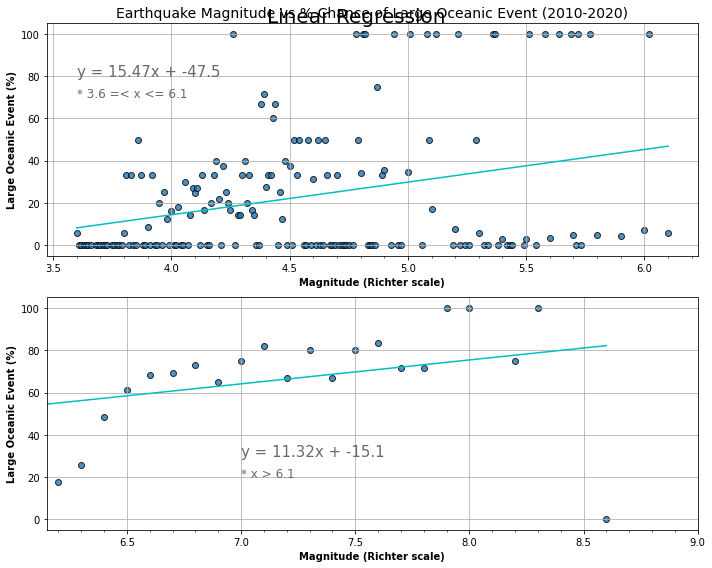

The r-squared for Linear Regression plot 1 is: 0.09215164953783825
The r-squared for Linear Regression plot 2 is: 0.08933200291320786


In [51]:
#Earthquake Magnitude vs % Chance of Large Oceanic Event (2010-2020)
# Mag 3.6 to 6.1 uses: mag_tsun_3p6To6p1
# Mag > 6.1 uses: mag_tsun_GT6p1

#get values
x1_values = mag_tsun_3p6To6p1["Magnitude"]
y1_values = mag_tsun_3p6To6p1["% Large Oceanic Event"]

x2_values = mag_tsun_GT6p1["Magnitude"]
y2_values = mag_tsun_GT6p1["% Large Oceanic Event"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
fig.suptitle('Linear Regression', fontsize= 20)

ax1.scatter(x1_values,y1_values, alpha = 0.8, edgecolors="k", linewidth=1)
ax1.plot(x1_values,regress_values,"c-")
ax1.annotate(line_eq,(3.6,80),fontsize=15,color="dimgray")
ax1.annotate('* 3.6 =< x <= 6.1',(3.6,70),fontsize=12,color="dimgray")

#Labels
ax1.set_xlabel("Magnitude (Richter scale)",fontweight='bold')
ax1.set_title("Earthquake Magnitude vs % Chance of Large Oceanic Event (2010-2020)", fontsize=14) 
ax1.set_ylabel("Large Oceanic Event (%)", fontweight = 'bold')
#ax1.set_xlabel("Magnitude (Richter scale)")


ax1.grid(True)
ax1.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

####################

# 2 mag_tsun_GT6p1
# Magnitude vs % Large Oceanic Event (2010 - 2020)
# Magnitudes of # >6.1
#linear regression
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values)
regress_values2 = x2_values * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))


ax2.scatter(x2_values,y2_values, alpha = 0.8, edgecolors="k", linewidth=1)
ax2.plot(x2_values,regress_values2,"c-")
ax2.annotate(line_eq2,(7,30),fontsize=15,color="dimgray")
ax2.annotate('* x > 6.1',(7,20),fontsize=12,color="dimgray")
#Label

ax2.set_xlabel("Magnitude (Richter scale)",fontweight='bold')
ax2.set_ylabel("Large Oceanic Event (%)", fontweight='bold')
ax2.set_xlim(6.15, 9)
ax2.grid(True)
ax2.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))


fig.tight_layout()

#save the figure and show
plt.savefig(output_folder + "10_DivisionMagnitudesLinearRegression.png", facecolor = 'white')
plt.show()


print(f"The r-squared for Linear Regression plot 1 is: {rvalue**2}")
print(f"The r-squared for Linear Regression plot 2 is: {rvalue2**2}")

In [52]:
# Thus, no correlation between Magnitude and Large Oceanic Events because r-squared 0.01 indicates no correlation
# to a 'very' weak correlation if there was one. 

In [53]:
# Can look at what happended at 8.6 magnitude. See why this did not trigger a large oceanic event:
# Look at data where magnitude = 8.6 get latitudes, review gps coordinates to see if landlocked
mag8p6=earthquake_data[earthquake_data['Magnitude']==8.6]
mag8p6

,id,Latitude,Longitude,Depth (km),Lat_Lng,Alert,Place,Date,Magnitude,Tsunami,Type,Country,Country_Code
5990,official20120411083836720_20,2.327,93.063,20.0,"(2.327, 93.063)",yellow,off the west coast of northern Sumatra,2012-04-11 04:38:36.720,8.6,0,earthquake,Aceh,ID


In [54]:
# Indeed this happened in the Indian Ocean, with a depth of 20 km
# Thus, Depth, and coordinates (if landlocked or not) are more variables to consider when looking at Magnitude 
# and large oceanic events. 
# Additionally, there may have been a better model to use to get a better ideal of the how the data
# fits. 
